# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
                          id  coin_id                              name  \
0                    apecoin    24383                           ApeCoin   
1         trust-wallet-token    11085                      Trust Wallet   
2                sei-network    28205                               Sei   
3                  thorchain     6595                         THORChain   
4               cyberconnect    31274                      CyberConnect   
5                   optimism    25244                          Optimism   
6  harrypotterobamasonic10in    30323  HarryPotterObamaSonic10Inu (ETH)   
7              worldcoin-wld    31069                         Worldcoin   

    symbol  market_cap_rank  \
0      APE               67   
1      TWT              100   
2      SEI              121   
3     RUNE               77   
4    CYBER              404   
5       OP               42   
6  BITCOIN              181   
7      WLD              160   

                           

In [3]:
coins_global_trends = coins_global_trends.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coins_global_trends)

                          id  coin_id                              name  \
0                    apecoin    24383                           apecoin   
1         trust-wallet-token    11085                      trust wallet   
2                sei-network    28205                               sei   
3                  thorchain     6595                         thorchain   
4               cyberconnect    31274                      cyberconnect   
5                   optimism    25244                          optimism   
6  harrypotterobamasonic10in    30323  harrypotterobamasonic10inu (eth)   
7              worldcoin-wld    31069                         worldcoin   

    symbol  market_cap_rank  \
0      ape               67   
1      twt              100   
2      sei              121   
3     rune               77   
4    cyber              404   
5       op               42   
6  bitcoin              181   
7      wld              160   

                                            

In [4]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,apecoin,ape,67,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,0.000059,0
1,trust-wallet-token,11085,trust wallet,twt,100,https://assets.coingecko.com/coins/images/1108...,https://assets.coingecko.com/coins/images/1108...,https://assets.coingecko.com/coins/images/1108...,trust-wallet-token,0.000033,1
2,sei-network,28205,sei,sei,121,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,2
3,thorchain,6595,thorchain,rune,77,https://assets.coingecko.com/coins/images/6595...,https://assets.coingecko.com/coins/images/6595...,https://assets.coingecko.com/coins/images/6595...,thorchain,0.000062,3
4,cyberconnect,31274,cyberconnect,cyber,404,https://assets.coingecko.com/coins/images/3127...,https://assets.coingecko.com/coins/images/3127...,https://assets.coingecko.com/coins/images/3127...,cyberconnect,0.000161,4
5,optimism,25244,optimism,op,42,https://assets.coingecko.com/coins/images/2524...,https://assets.coingecko.com/coins/images/2524...,https://assets.coingecko.com/coins/images/2524...,optimism,0.000057,5
6,harrypotterobamasonic10in,30323,harrypotterobamasonic10inu (eth),bitcoin,181,https://assets.coingecko.com/coins/images/3032...,https://assets.coingecko.com/coins/images/3032...,https://assets.coingecko.com/coins/images/3032...,harrypotterobamasonic10inu-eth,0.000006,6
7,worldcoin-wld,31069,worldcoin,wld,160,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000057,7


In [5]:
list_rank = coins_global_trends['symbol'].tolist()

#### Guardo csv: coins_global_trends.csv

In [6]:
coins_global_trends.to_csv('../Csvs_cleanned/coins_global_trends.csv', index=False, mode='w')

In [7]:
list_rank

['ape', 'twt', 'sei', 'rune', 'cyber', 'op', 'bitcoin', 'wld']

_____________________________________________________________

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

#### Conection:

In [8]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10115
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -0.731389
market_cap_percentage                 {'btc': 46.23359877850675, 'eth': 18.347898534...
markets                                                                             830
ongoing_icos                                                                         49
total_market_cap                      {'btc': 42098859.95084686, 'eth': 654886450.45...
total_volume                          {'btc': 1204933.1269833806, 'eth': 18743841.98...
upcoming_icos                                                                         0
updated_at                                                                   1692616714


#### Market_cap_percentage: %

In [9]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.233599
1     eth              18.347899
2    usdt               7.579441
3     bnb               2.957571
4     xrp               2.521138
5    usdc               2.377544
6   steth               1.260998
7     ada               0.852359
8    doge               0.803820
9     sol               0.786666


#### Market_cap: $

In [10]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.209886e+07
1      eth      6.548865e+08
2      ltc      1.676319e+10
3      bch      5.839809e+09
4      bnb      5.209942e+09
..     ...               ...
56     xdr      8.176450e+11
57     xag      4.801130e+10
58     xau      5.781122e+08
59    bits      4.209886e+13
60    sats      4.209886e+15

[61 rows x 2 columns]


#### Total_volume: $

In [11]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  1.204933e+06
1      eth  1.874384e+07
2      ltc  4.797879e+08
3      bch  1.671442e+08
4      bnb  1.491164e+08
..     ...           ...
56     xdr  2.340224e+10
57     xag  1.374156e+09
58     xau  1.654645e+07
59    bits  1.204933e+12
60    sats  1.204933e+14

[61 rows x 2 columns]


#### Merged:

In [12]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')
merged_df = merged_df.sort_values(by=['market_cap_percentage', 'total_volume'], ascending=[False, False])

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.233599      4.209886e+07  1.204933e+06
1     eth              18.347899      6.548865e+08  1.874384e+07
2     bnb               2.957571      5.209942e+09  1.491164e+08
3     xrp               2.521138      2.094244e+12  5.994043e+10


#### Guardo csv: tops_criptos.csv

In [13]:
merged_df.to_csv('../Csvs_cleanned/top_criptos.csv', index=False, mode='w')

#### Combinacion, listado de codigos en los listados recientemente importados:

In [14]:
lista_coins0 = merged_df['crip_id'].tolist()
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [15]:
complete_list = lista_coins0 + lista_coins1 + list_rank #+ lista_coins2 + lista_coins3
complete_list = list(set(complete_list)) #quitar duplicados

##### Listado completo de ids a buscar como los mas recomendados en base a marketcap y total volume de cada cripto. HOY, YA!, AHORA!.

In [16]:
len(complete_list)

18

In [17]:
complete_list_lower = [item.lower() if isinstance(item, str) else item for item in complete_list]


In [18]:
complete_list_lower

['bitcoin',
 'wld',
 'twt',
 'sei',
 'xrp',
 'rune',
 'cyber',
 'eth',
 'usdc',
 'op',
 'usdt',
 'steth',
 'btc',
 'sol',
 'bnb',
 'ape',
 'doge',
 'ada']

### 🪙📚 Listado de monedas: 

#### Importando listado de ids criptos API coingecko: Obteniendo el listado de ids anteriormente destacados, o al menos todos los que se encuentren disponibles en API

In [19]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10110                  zynecoin    zyn                   Zynecoin
10111                   zynergy    zyn                    Zynergy
10112                     zyrri    zyr                      Zyrri
10113                       zyx    zyx                        ZYX
10114                       zzz    zzz                GoSleep ZZZ

[10115 rows x 3 columns]


In [20]:
coin_id.head(15)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
5,0x1-tools-ai-multi-tool,0x1,0x1.tools: AI Multi-tool
6,0xauto-io-contract-auto-deployer,0xa,0xAuto.io : Contract Auto Deployer
7,0xcoco,coco,0xCoco
8,0xdao,oxd,0xDAO
9,0xdao-v2,oxd v2,0xDAO V2


In [21]:
coin_id.shape

(10115, 3)

In [22]:
coin_id = coin_id.drop_duplicates()

#### Filtrado De las mas relevantes:

In [23]:
coin_id = coin_id[
    coin_id['symbol'].isin(complete_list) |
    coin_id['id'].isin(complete_list) |
    coin_id['name'].isin(complete_list)
]


In [24]:
coin_id.head(20)

,id,symbol,name
481,apecoin,ape,ApeCoin
487,apemove,ape,APEmove
1095,binancecoin,bnb,BNB
1096,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1102,binance-peg-cardano,ada,Binance-Peg Cardano
1103,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1111,binance-peg-xrp,xrp,Binance-Peg XRP
1150,bitcoin,btc,Bitcoin
1454,bridged-tether-linea,usdt,Bridged Tether (Linea)
1455,bridged-tether-stargate,usdt,Bridged Tether (Stargate)


In [25]:
coin_id.shape

(43, 3)

In [26]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [27]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [28]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 481 to 9710
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  43 non-null     object
 1   symbol   43 non-null     object
 2   name     43 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [29]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [30]:

coin_id = coin_id.head().applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coin_id)

                    crip_id symbol                     name
481                 apecoin    ape                  apecoin
487                 apemove    ape                  apemove
1095            binancecoin    bnb                      bnb
1096  binance-coin-wormhole    bnb  binance coin (wormhole)
1102    binance-peg-cardano    ada      binance-peg cardano


In [31]:
coin_id.head(10)

,crip_id,symbol,name
481,apecoin,ape,apecoin
487,apemove,ape,apemove
1095,binancecoin,bnb,bnb
1096,binance-coin-wormhole,bnb,binance coin (wormhole)
1102,binance-peg-cardano,ada,binance-peg cardano


In [32]:
coin_id.shape

(5, 3)

##### Guardo csv contenedor de info crip_ip:

In [33]:
coin_id.to_csv('../Csvs_cleanned/coin_id.csv', index=False, mode='w')

In [34]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [35]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [36]:
lista_coins = list(set(lista_coins))

#### Guardo lista de las mas importantes. para ser luego utilizadas por los demas codigos.

In [37]:
len(lista_coins)

10

In [38]:
lista_coins

['binance coin (wormhole)',
 'binance-coin-wormhole',
 'apecoin',
 'binancecoin',
 'binance-peg-cardano',
 'binance-peg cardano',
 'apemove',
 'bnb',
 'ape',
 'ada']

#### Producto: lista_coins

##### Agregado de alguunas que si o si queremos que esten

In [39]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['binance coin (wormhole)', 'binance-coin-wormhole', 'apecoin', 'binancecoin', 'binance-peg-cardano', 'binance-peg cardano', 'apemove', 'bnb', 'ape', 'ada', 'ethereum', 'bitcoin']


##### Cantidad de coins a obtener informacion:

In [40]:
print(len(lista_coins))

12


###  Listado ids coingecko + info general, ranking .. posee info MUY IMPORTANTE https://api.coingecko.com/api/v3/coins/bitcoin?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false

tarda aprox 6 minutos, api limitation for lot of request , have tu wait at #429

In [41]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_id_list(crip_id)

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)



Error en la solicitud: Listado de monedas binance coin (wormhole) 404


Error en la solicitud: Listado de monedas binance-peg cardano 404
Error en la solicitud: Listado de monedas bnb 404
Error en la solicitud: Listado de monedas ape 404
Error en la solicitud: Listado de monedas ada 404


In [42]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          7 non-null      object 
 1   id                               7 non-null      object 
 2   symbol                           7 non-null      object 
 3   name                             7 non-null      object 
 4   asset_platform_id                4 non-null      object 
 5   block_time_in_minutes            7 non-null      int64  
 6   country_origin                   7 non-null      object 
 7   contract_address                 4 non-null      object 
 8   watchlist_portfolio_users        7 non-null      int64  
 9   coingecko_rank                   7 non-null      int64  
 10  coingecko_score                  7 non-null      float64
 11  developer_score                  7 non-null      float64
 12  community_score           

In [43]:
list_of_coins_id_resume.head(20)

,crip_id,id,symbol,name,asset_platform_id,block_time_in_minutes,country_origin,contract_address,watchlist_portfolio_users,coingecko_rank,...,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,genesis_date,hashing_algorithm
0,binance-coin-wormhole,binance-coin-wormhole,bnb,Binance Coin (Wormhole),ethereum,0,,0x418d75f65a02b3d53b2418fb8e1fe493759c7605,910,3820,...,0.000,9.446,19.493,0.003,2023-08-21T11:21:21.955Z,NaN,NaN,NaN,NaN,NaN
1,apecoin,apecoin,ape,ApeCoin,ethereum,0,,0x4d224452801aced8b2f0aebe155379bb5d594381,92266,310,...,0.000,10.909,70.167,0.009,2023-08-21T11:21:24.392Z,48.00,52.00,67.0,NaN,NaN
2,binancecoin,binancecoin,bnb,BNB,NaN,0,,NaN,642480,5,...,73.082,61.771,73.073,11.364,2023-08-21T11:21:21.610Z,46.67,53.33,4.0,2017-07-08,NaN
3,binance-peg-cardano,binance-peg-cardano,ada,Binance-Peg Cardano,binance-smart-chain,0,,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,1115,3466,...,0.000,11.591,26.698,0.023,2023-08-21T11:21:21.277Z,NaN,NaN,NaN,NaN,NaN
4,apemove,apemove,ape,APEmove,binance-smart-chain,0,,0xed3d88d3321f82e5c25ca9ac6d5b427ec93f567e,14167,2797,...,0.000,9.270,1.000,0.006,2023-08-21T11:21:04.638Z,NaN,NaN,3500.0,NaN,NaN
5,ethereum,ethereum,eth,Ethereum,NaN,0,,NaN,1193295,2,...,97.494,72.746,95.183,0.236,2023-08-21T11:21:29.926Z,58.82,41.18,2.0,2015-07-30,Ethash
6,bitcoin,bitcoin,btc,Bitcoin,NaN,10,,NaN,1330980,1,...,99.241,83.341,100.011,0.073,2023-08-21T11:21:22.519Z,66.90,33.10,1.0,2009-01-03,SHA-256


In [44]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [45]:

list_of_coins_id_resume = list_of_coins_id_resume.head().applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(list_of_coins_id_resume.head())

                 crip_id    asset_platform_id  block_time_in_minutes  \
0  binance-coin-wormhole             ethereum                      0   
1                apecoin             ethereum                      0   
2            binancecoin                  NaN                      0   
3    binance-peg-cardano  binance-smart-chain                      0   
4                apemove  binance-smart-chain                      0   

   watchlist_portfolio_users  coingecko_rank  coingecko_score  \
0                        910            3820            5.977   
1                      92266             310           32.451   
2                     642480               5           65.446   
3                       1115            3466            7.891   
4                      14167            2797           11.610   

   developer_score  community_score  liquidity_score  public_interest_score  \
0            0.000            9.446           19.493                  0.003   
1            0.000

In [46]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank
0,binance-coin-wormhole,ethereum,0,910,3820,5.977,0.000,9.446,19.493,0.003,2023-08-21t11:21:21.955z,NaN,NaN,NaN
1,apecoin,ethereum,0,92266,310,32.451,0.000,10.909,70.167,0.009,2023-08-21t11:21:24.392z,48.00,52.00,67.0
2,binancecoin,NaN,0,642480,5,65.446,73.082,61.771,73.073,11.364,2023-08-21t11:21:21.610z,46.67,53.33,4.0
3,binance-peg-cardano,binance-smart-chain,0,1115,3466,7.891,0.000,11.591,26.698,0.023,2023-08-21t11:21:21.277z,NaN,NaN,NaN
4,apemove,binance-smart-chain,0,14167,2797,11.610,0.000,9.270,1.000,0.006,2023-08-21t11:21:04.638z,NaN,NaN,3500.0


In [47]:
list_of_coins_id_resume.shape

(5, 14)

##### Guardo csv ranking_coingecko:

In [48]:
list_of_coins_id_resume.to_csv('../Csvs_cleanned/ranking_coingecko.csv', index=False , mode= 'w')

In [49]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['binance-coin-wormhole', 'apecoin', 'binancecoin', 'binance-peg-cardano', 'apemove', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [50]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list_of_prices(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_list_of_prices(crip_id) # Reintentar error 429
        


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list_of_prices(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        

    print(list_of_coins_resume)
    

Error en la solicitud para apecoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


                            prices                          market_caps  \
0       [1678579200000, 276.87295]                 [1678579200000, 0.0]   
1       [1678665600000, 292.07583]                 [1678665600000, 0.0]   
2       [1678752000000, 307.27106]                 [1678752000000, 0.0]   
3        [1678838400000, 312.7119]                 [1678838400000, 0.0]   
4       [1678924800000, 307.90518]                 [1678924800000, 0.0]   
...                            ...                                  ...   
1143  [1692316800000, 26501.58727]  [1692316800000, 516026928368.83746]   
1144  [1692403200000, 26042.83826]   [1692403200000, 506815826635.9217]   
1145  [1692489600000, 26104.77863]  [1692489600000, 508087686822.70435]   
1146  [1692576000000, 26160.70042]   [1692576000000, 509078930366.0949]   
1147  [1692595656000, 26084.75645]  [1692595656000, 507706941962.85004]   

                            total_volumes                crip_id  
0      [1678579200000, 7930.5094

In [51]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                            prices                          market_caps  \
1144  [1692403200000, 26042.83826]   [1692403200000, 506815826635.9217]   
1145  [1692489600000, 26104.77863]  [1692489600000, 508087686822.70435]   
1146  [1692576000000, 26160.70042]   [1692576000000, 509078930366.0949]   
1147  [1692595656000, 26084.75645]  [1692595656000, 507706941962.85004]   

                            total_volumes  crip_id  
1144   [1692403200000, 18062351745.50358]  bitcoin  
1145  [1692489600000, 3355038748.9824667]  bitcoin  
1146   [1692576000000, 8304370131.833873]  bitcoin  
1147   [1692595656000, 9136828929.177465]  bitcoin  
                       prices           market_caps  \
0  [1678579200000, 276.87295]  [1678579200000, 0.0]   
1  [1678665600000, 292.07583]  [1678665600000, 0.0]   
2  [1678752000000, 307.27106]  [1678752000000, 0.0]   
3   [1678838400000, 312.7119]  [1678838400000, 0.0]   

                         total_volumes                crip_id  
0   [1678579200000,

In [52]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1678579200000, 276.87295]","[1678579200000, 0.0]","[1678579200000, 7930.509455445385]",binance-coin-wormhole
1,"[1678665600000, 292.07583]","[1678665600000, 0.0]","[1678665600000, 5512.570483825735]",binance-coin-wormhole
2,"[1678752000000, 307.27106]","[1678752000000, 0.0]","[1678752000000, 8063.606081471991]",binance-coin-wormhole
3,"[1678838400000, 312.7119]","[1678838400000, 0.0]","[1678838400000, 1004.4071407544835]",binance-coin-wormhole
4,"[1678924800000, 307.90518]","[1678924800000, 0.0]","[1678924800000, 1531.9064876908424]",binance-coin-wormhole


####  Extraer de las listas los valores necesarios

In [53]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [54]:
prices = prices.drop_duplicates()

In [55]:
prices.shape

(1148, 5)

In [56]:

cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

7


In [57]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1148 non-null   int64  
 1   price         1148 non-null   float64
 2   market_cap    1148 non-null   float64
 3   total_volume  1148 non-null   float64
 4   crip_id       1148 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 45.0+ KB


In [58]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [59]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [60]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,binance-coin-wormhole,1678579200000,276.87295,0.0,7930.509277
1,binance-coin-wormhole,1678665600000,292.07583,0.0,5512.570312
2,binance-coin-wormhole,1678752000000,307.27106,0.0,8063.605957
3,binance-coin-wormhole,1678838400000,312.71190,0.0,1004.407166
4,binance-coin-wormhole,1678924800000,307.90518,0.0,1531.906494


##### Guardo csv prices:

In [61]:
prices.to_csv('../Csvs_cleanned/prices.csv', index=False, mode='w')

#### Prices_normalized:

In [62]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [63]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,binance-coin-wormhole,1678579200000,0.008805,0.0,1.121455e-07
1,binance-coin-wormhole,1678665600000,0.009288,0.0,7.795245e-08
2,binance-coin-wormhole,1678752000000,0.009771,0.0,1.140276e-07
3,binance-coin-wormhole,1678838400000,0.009944,0.0,1.420074e-08
4,binance-coin-wormhole,1678924800000,0.009791,0.0,2.166032e-08


##### Guardo prices_normalized.csv

In [64]:
prices_normalized.to_csv('../Csvs_cleanned/prices_normalized.csv', index=False, mode='w')

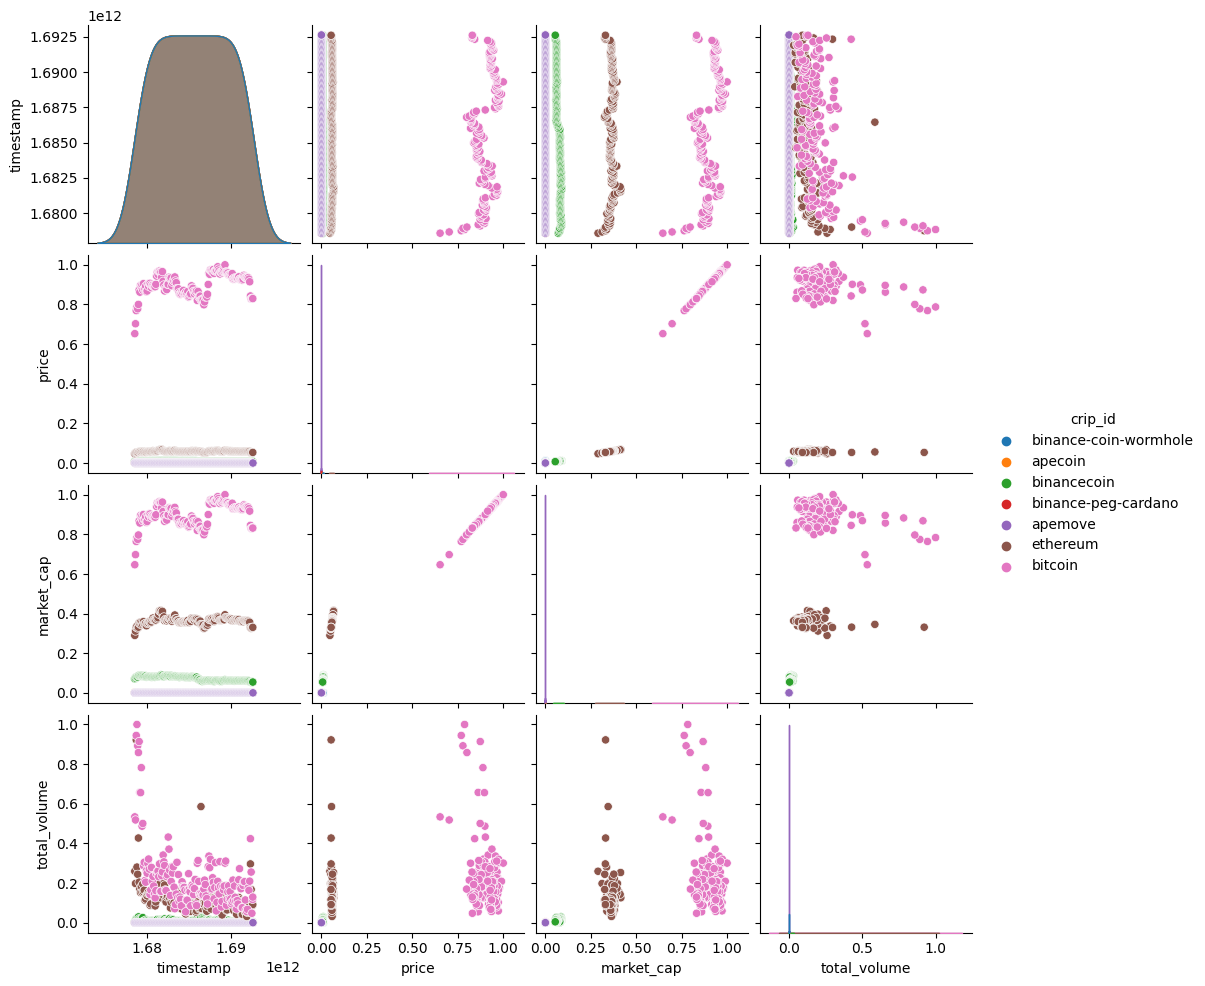

In [65]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [66]:
def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open_price", "high_price", "high_price", "close_price"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_ohlc_list(crip_id)

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)



Error en la solicitud: Datos OHLC de bitcoin 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [67]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [68]:
list_of_ohlc_data.isnull().sum()

timestamp      0
open_price     0
high_price     0
high_price     0
close_price    0
crip_id        0
dtype: int64

In [69]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1243 non-null   int64  
 1   open_price   1243 non-null   float64
 2   high_price   1243 non-null   float64
 3   high_price   1243 non-null   float64
 4   close_price  1243 non-null   float64
 5   crip_id      1243 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 58.4+ KB
None


In [70]:
list_of_ohlc_data.head()

,timestamp,open_price,high_price,high_price,close_price,crip_id
0,1690041600000,242.97689,242.97689,242.20038,242.20038,binance-coin-wormhole
1,1690056000000,243.14666,243.14666,242.28142,242.41653,binance-coin-wormhole
2,1690070400000,242.72512,243.12710,241.56066,241.56066,binance-coin-wormhole
3,1690084800000,240.78738,243.31761,240.78738,242.64126,binance-coin-wormhole
4,1690099200000,242.98534,242.98534,242.41721,242.41721,binance-coin-wormhole


In [71]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


7


##### Guardo csv OHLC:

In [72]:
list_of_ohlc_data.to_csv('../Csvs_cleanned/ohlc_prices.csv', index=False, mode='w')

### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [73]:


def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print(f"Error en la solicitud de tickers {crip_id}:", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_tickers(coin_id)  # Reintentar la solicitud después de esperar
            
if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)

In [74]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [75]:
tickers_resume.head(10)

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Jupiter', 'identifier': 'jupiter', 'has_trading_incentive': False}",207.299302,1.625498e+01,"{'btc': 0.00802377, 'eth': 0.12481037, 'usd': 208.24}","{'btc': 0.14342161, 'eth': 2.230934, 'usd': 3722.15}",None,NaN,2023-08-21T11:19:29+00:00,2023-08-21T11:19:29+00:00,2023-08-21T11:22:41+00:00,False,False,https://jup.ag/swap/9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa_EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,None,binance-coin-wormhole,usd-coin
1,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Raydium', 'identifier': 'raydium2', 'has_trading_incentive': False}",207.804009,1.625599e+01,"{'btc': 0.00802725, 'eth': 0.12485852, 'usd': 208.33}","{'btc': 0.14314367, 'eth': 2.226503, 'usd': 3714.94}",None,NaN,2023-08-21T11:21:18+00:00,2023-08-21T11:21:18+00:00,2023-08-21T11:21:18+00:00,False,False,https://raydium.io/swap?inputCurrency=9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa&outputCurrency=EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,None,binance-coin-wormhole,usd-coin
2,0X418D75F65A02B3D53B2418FB8E1FE493759C7605,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V3 (Ethereum)', 'identifier': 'uniswap_v3', 'has_trading_incentive': False}",0.141250,9.815056e+00,"{'btc': 0.00880271, 'eth': 0.14121992, 'usd': 244.4}","{'btc': 0.08585638, 'eth': 1.377375, 'usd': 2383.71}",green,0.707536,2023-08-17T15:56:14+00:00,2023-08-17T15:56:14+00:00,2023-08-17T16:19:19+00:00,True,True,https://app.uniswap.org/#/swap?inputCurrency=0x418d75f65a02b3d53b2418fb8e1fe493759c7605&outputCurrency=ETH,None,binance-coin-wormhole,weth
3,APE,USDT,"{'name': 'MEXC', 'identifier': 'mxc', 'has_trading_incentive': False}",1.537000,1.009187e+05,"{'btc': 5.921e-05, 'eth': 0.00092086, 'usd': 1.54}","{'btc': 5.975018, 'eth': 92.932, 'usd': 155049}",green,0.065062,2023-08-21T11:19:57+00:00,2023-08-21T11:19:57+00:00,2023-08-21T11:19:57+00:00,False,False,https://www.mexc.com/exchange/APE_USDT,None,apecoin,tether
4,APE,USDT,"{'name': 'Bitget', 'identifier': 'bitget', 'has_trading_incentive': False}",1.537200,1.372944e+06,"{'btc': 5.921e-05, 'eth': 0.0009209, 'usd': 1.54}","{'btc': 84.038, 'eth': 1307, 'usd': 2180963}",green,0.065058,2023-08-21T11:20:07+00:00,2023-08-21T11:20:07+00:00,2023-08-21T11:20:07+00:00,False,False,https://www.bitget.com/spot/APEUSDT?type=spot,None,apecoin,tether
5,APE,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",1.534600,8.824939e+05,"{'btc': 5.911e-05, 'eth': 0.00091934, 'usd': 1.53}","{'btc': 52.168, 'eth': 811.311, 'usd': 1353854}",green,0.052053,2023-08-21T11:20:03+00:00,2023-08-21T11:20:03+00:00,2023-08-21T11:20:03+00:00,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=APE_USDT,None,apecoin,tether
6,APE,USDC,"{'name': 'Bitget', 'identifier': 'bitget', 'has_trading_incentive': False}",1.538400,6.491339e+04,"{'btc': 5.928e-05, 'eth': 0.00092197, 'usd': 1.54}","{'btc': 3.978946, 'eth': 61.881, 'usd': 103262}",green,0.357398,2023-08-21T11:20:08+00:00,2023-08-21T11:20:08+00:00,2023-08-21T11:20:08+00:00,False,False,https://www.bitget.com/spot/APEUSDC?type=spot,None,apecoin,usd-coin
7,APE,USDT,"{'name': 'CoinTR Pro', 'identifier': 'cointr', 'has_trading_incentive': False}",1.537000,7.263050e+04,"{'btc': 5.921e-05, 'eth': 0.00092078, 'usd': 1.54}","{'btc': 4.435296, 'eth': 68.978, 'usd': 115105}",green,0.324886,2023-08-21T11:20:17+00:00,2023-08-21T11:20:17+00:00,2023-08-21T11:20:17+00:00,False,False,https://www.cointr.com/en-us/spot/APE_USDT,None,apecoin,tether
8,APE,USDT,"{'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}",1.537000,4.116809e+06,"{'btc': 5.921e-05, 'eth': 0.00092086, 'usd': 1.54}","{'btc'

In [76]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head(15)
print(rows_with_nulls.shape)

(416, 18)


In [77]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [78]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [79]:
tickers_resume.shape

(417, 18)

In [80]:
tickers_resume.isnull().sum()

base                         0
target                       0
market                       0
last                         0
volume                       0
converted_last               0
converted_volume             0
trust_score                  5
bid_ask_spread_percentage    2
timestamp                    0
last_traded_at               0
last_fetch_at                0
is_anomaly                   0
is_stale                     0
trade_url                    0
token_info_url               0
coin_id                      0
target_coin_id               0
dtype: int64

#### Timestamp

In [81]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [82]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Jupiter', 'identifier': 'jupiter', 'has_trading_incentive': False}",207.299302,1.625498e+01,"{'btc': 0.00802377, 'eth': 0.12481037, 'usd': 208.24}","{'btc': 0.14342161, 'eth': 2.230934, 'usd': 3722.15}",None,NaN,1692616769000,1692616769000,1692616961000,False,False,https://jup.ag/swap/9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa_EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin
1,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Raydium', 'identifier': 'raydium2', 'has_trading_incentive': False}",207.804009,1.625599e+01,"{'btc': 0.00802725, 'eth': 0.12485852, 'usd': 208.33}","{'btc': 0.14314367, 'eth': 2.226503, 'usd': 3714.94}",None,NaN,1692616878000,1692616878000,1692616878000,False,False,https://raydium.io/swap?inputCurrency=9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa&outputCurrency=EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin
2,0X418D75F65A02B3D53B2418FB8E1FE493759C7605,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V3 (Ethereum)', 'identifier': 'uniswap_v3', 'has_trading_incentive': False}",0.141250,9.815056e+00,"{'btc': 0.00880271, 'eth': 0.14121992, 'usd': 244.4}","{'btc': 0.08585638, 'eth': 1.377375, 'usd': 2383.71}",green,0.707536,1692287774000,1692287774000,1692289159000,True,True,https://app.uniswap.org/#/swap?inputCurrency=0x418d75f65a02b3d53b2418fb8e1fe493759c7605&outputCurrency=ETH,not founded token_info_url #404,binance-coin-wormhole,weth
3,APE,USDT,"{'name': 'MEXC', 'identifier': 'mxc', 'has_trading_incentive': False}",1.537000,1.009187e+05,"{'btc': 5.921e-05, 'eth': 0.00092086, 'usd': 1.54}","{'btc': 5.975018, 'eth': 92.932, 'usd': 155049}",green,0.065062,1692616797000,1692616797000,1692616797000,False,False,https://www.mexc.com/exchange/APE_USDT,not founded token_info_url #404,apecoin,tether
4,APE,USDT,"{'name': 'Bitget', 'identifier': 'bitget', 'has_trading_incentive': False}",1.537200,1.372944e+06,"{'btc': 5.921e-05, 'eth': 0.0009209, 'usd': 1.54}","{'btc': 84.038, 'eth': 1307, 'usd': 2180963}",green,0.065058,1692616807000,1692616807000,1692616807000,False,False,https://www.bitget.com/spot/APEUSDT?type=spot,not founded token_info_url #404,apecoin,tether


#### market

In [83]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [84]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Jupiter', 'identifier': 'jupiter', 'has_trading_incentive': False}",207.299302,1.625498e+01,"{'btc': 0.00802377, 'eth': 0.12481037, 'usd': 208.24}","{'btc': 0.14342161, 'eth': 2.230934, 'usd': 3722.15}",None,NaN,1692616769000,1692616769000,1692616961000,False,False,https://jup.ag/swap/9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa_EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,Jupiter,jupiter
1,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Raydium', 'identifier': 'raydium2', 'has_trading_incentive': False}",207.804009,1.625599e+01,"{'btc': 0.00802725, 'eth': 0.12485852, 'usd': 208.33}","{'btc': 0.14314367, 'eth': 2.226503, 'usd': 3714.94}",None,NaN,1692616878000,1692616878000,1692616878000,False,False,https://raydium.io/swap?inputCurrency=9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa&outputCurrency=EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,Raydium,raydium2
2,0X418D75F65A02B3D53B2418FB8E1FE493759C7605,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V3 (Ethereum)', 'identifier': 'uniswap_v3', 'has_trading_incentive': False}",0.141250,9.815056e+00,"{'btc': 0.00880271, 'eth': 0.14121992, 'usd': 244.4}","{'btc': 0.08585638, 'eth': 1.377375, 'usd': 2383.71}",green,0.707536,1692287774000,1692287774000,1692289159000,True,True,https://app.uniswap.org/#/swap?inputCurrency=0x418d75f65a02b3d53b2418fb8e1fe493759c7605&outputCurrency=ETH,not founded token_info_url #404,binance-coin-wormhole,weth,Uniswap V3 (Ethereum),uniswap_v3
3,APE,USDT,"{'name': 'MEXC', 'identifier': 'mxc', 'has_trading_incentive': False}",1.537000,1.009187e+05,"{'btc': 5.921e-05, 'eth': 0.00092086, 'usd': 1.54}","{'btc': 5.975018, 'eth': 92.932, 'usd': 155049}",green,0.065062,1692616797000,1692616797000,1692616797000,False,False,https://www.mexc.com/exchange/APE_USDT,not founded token_info_url #404,apecoin,tether,MEXC,mxc
4,APE,USDT,"{'name': 'Bitget', 'identifier': 'bitget', 'has_trading_incentive': False}",1.537200,1.372944e+06,"{'btc': 5.921e-05, 'eth': 0.0009209, 'usd': 1.54}","{'btc': 84.038, 'eth': 1307, 'usd': 2180963}",green,0.065058,1692616807000,1692616807000,1692616807000,False,False,https://www.bitget.com/spot/APEUSDT?type=spot,not founded token_info_url #404,apecoin,tether,Bitget,bitget


#### converted_last


In [85]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [86]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       417 non-null    object 
 1   target                     417 non-null    object 
 2   market                     417 non-null    object 
 3   last                       417 non-null    float64
 4   volume                     417 non-null    float64
 5   converted_last             417 non-null    object 
 6   converted_volume           417 non-null    object 
 7   trust_score                412 non-null    object 
 8   bid_ask_spread_percentage  415 non-null    float64
 9   timestamp                  417 non-null    int64  
 10  last_traded_at             417 non-null    int64  
 11  last_fetch_at              417 non-null    int64  
 12  is_anomaly                 417 non-null    bool   
 13  is_stale                   417 non-null    bool   

In [87]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Jupiter', 'identifier': 'jupiter', 'has_trading_incentive': False}",207.299302,1.625498e+01,"{'btc': 0.00802377, 'eth': 0.12481037, 'usd': 208.24}","{'btc': 0.14342161, 'eth': 2.230934, 'usd': 3722.15}",None,NaN,1692616769000,...,False,https://jup.ag/swap/9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa_EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,Jupiter,jupiter,0.008024,0.124810,208.24
1,9GP2KCY3WA1CTVYWQK75GUQXUHFREOMQYDHLTCTCQILA,EPJFWDD5AUFQSSQEM2QN1XZYBAPC8G4WEGGKZWYTDT1V,"{'name': 'Raydium', 'identifier': 'raydium2', 'has_trading_incentive': False}",207.804009,1.625599e+01,"{'btc': 0.00802725, 'eth': 0.12485852, 'usd': 208.33}","{'btc': 0.14314367, 'eth': 2.226503, 'usd': 3714.94}",None,NaN,1692616878000,...,False,https://raydium.io/swap?inputCurrency=9gP2kCy3wA1ctvYWQk75guqXuHfrEomqydHLtcTCqiLa&outputCurrency=EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,Raydium,raydium2,0.008027,0.124859,208.33
2,0X418D75F65A02B3D53B2418FB8E1FE493759C7605,0XC02AAA39B223FE8D0A0E5C4F27EAD9083C756CC2,"{'name': 'Uniswap V3 (Ethereum)', 'identifier': 'uniswap_v3', 'has_trading_incentive': False}",0.141250,9.815056e+00,"{'btc': 0.00880271, 'eth': 0.14121992, 'usd': 244.4}","{'btc': 0.08585638, 'eth': 1.377375, 'usd': 2383.71}",green,0.707536,1692287774000,...,True,https://app.uniswap.org/#/swap?inputCurrency=0x418d75f65a02b3d53b2418fb8e1fe493759c7605&outputCurrency=ETH,not founded token_info_url #404,binance-coin-wormhole,weth,Uniswap V3 (Ethereum),uniswap_v3,0.008803,0.141220,244.40
3,APE,USDT,"{'name': 'MEXC', 'identifier': 'mxc', 'has_trading_incentive': False}",1.537000,1.009187e+05,"{'btc': 5.921e-05, 'eth': 0.00092086, 'usd': 1.54}","{'btc': 5.975018, 'eth': 92.932, 'usd': 155049}",green,0.065062,1692616797000,...,False,https://www.mexc.com/exchange/APE_USDT,not founded token_info_url #404,apecoin,tether,MEXC,mxc,0.000059,0.000921,1.54
4,APE,USDT,"{'name': 'Bitget', 'identifier': 'bitget', 'has_trading_incentive': False}",1.537200,1.372944e+06,"{'btc': 5.921e-05, 'eth': 0.0009209, 'usd': 1.54}","{'btc': 84.038, 'eth': 1307, 'usd': 2180963}",green,0.065058,1692616807000,...,False,https://www.bitget.com/spot/APEUSDT?type=spot,not founded token_info_url #404,apecoin,tether,Bitget,bitget,0.000059,0.000921,1.54


#### converted_volume


In [88]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [89]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       417 non-null    object 
 1   target                     417 non-null    object 
 2   market                     417 non-null    object 
 3   last                       417 non-null    float64
 4   volume                     417 non-null    float64
 5   converted_last             417 non-null    object 
 6   converted_volume           417 non-null    object 
 7   trust_score                412 non-null    object 
 8   bid_ask_spread_percentage  415 non-null    float64
 9   timestamp                  417 non-null    int64  
 10  last_traded_at             417 non-null    int64  
 11  last_fetch_at              417 non-null    int64  
 12  is_anomaly                 417 non-null    bool   
 13  is_stale                   417 non-null    bool   

In [90]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [91]:
tickers_resume = tickers_resume.head(10).applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [92]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila,epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,207.299302,1.625498e+01,None,NaN,1692616769000,1692616769000,1692616961000,False,...,binance-coin-wormhole,usd-coin,jupiter,jupiter,0.008024,0.124810,208.24,0.143422,2.230934,3722.15
1,9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila,epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,207.804009,1.625599e+01,None,NaN,1692616878000,1692616878000,1692616878000,False,...,binance-coin-wormhole,usd-coin,raydium,raydium2,0.008027,0.124859,208.33,0.143144,2.226503,3714.94
2,0x418d75f65a02b3d53b2418fb8e1fe493759c7605,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.141250,9.815056e+00,green,0.707536,1692287774000,1692287774000,1692289159000,True,...,binance-coin-wormhole,weth,uniswap v3 (ethereum),uniswap_v3,0.008803,0.141220,244.40,0.085856,1.377375,2383.71
3,ape,usdt,1.537000,1.009187e+05,green,0.065062,1692616797000,1692616797000,1692616797000,False,...,apecoin,tether,mexc,mxc,0.000059,0.000921,1.54,5.975018,92.932000,155049.00
4,ape,usdt,1.537200,1.372944e+06,green,0.065058,1692616807000,1692616807000,1692616807000,False,...,apecoin,tether,bitget,bitget,0.000059,0.000921,1.54,84.038000,1307.000000,2180963.00


In [93]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)

##### Guardo ticker.csv:

In [94]:
tickers_resume.to_csv('../Csvs_cleanned/tickers_resume.csv', index=False, mode='w')

In [95]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       10 non-null     object 
 1   target                     10 non-null     object 
 2   last                       10 non-null     float64
 3   volume                     10 non-null     float64
 4   trust_score                8 non-null      object 
 5   bid_ask_spread_percentage  8 non-null      float64
 6   timestamp                  10 non-null     int64  
 7   last_traded_at             10 non-null     int64  
 8   last_fetch_at              10 non-null     int64  
 9   is_anomaly                 10 non-null     bool   
 10  is_stale                   10 non-null     bool   
 11  trade_url                  10 non-null     object 
 12  token_info_url             10 non-null     object 
 13  crip_id                    10 non-null     object 
 1

#### ticker_df numeric cols correlation matrix

In [96]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

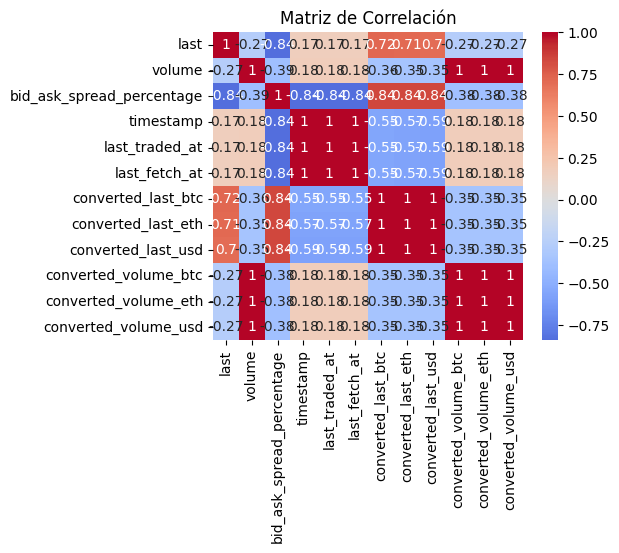

In [97]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [98]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [99]:
tickers_resume.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila,epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,207.299302,1.625498e+01,None,NaN,1692616769000,1692616769000,1692616961000,False,False,https://jup.ag/swap/9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila_epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,jupiter,jupiter,0.008024,0.124810,208.24,0.143422,2.230934,3722.15
1,9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila,epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,207.804009,1.625599e+01,None,NaN,1692616878000,1692616878000,1692616878000,False,False,https://raydium.io/swap?inputcurrency=9gp2kcy3wa1ctvywqk75guqxuhfreomqydhltctcqila&outputcurrency=epjfwdd5aufqssqem2qn1xzybapc8g4weggkzwytdt1v,not founded token_info_url #404,binance-coin-wormhole,usd-coin,raydium,raydium2,0.008027,0.124859,208.33,0.143144,2.226503,3714.94
2,0x418d75f65a02b3d53b2418fb8e1fe493759c7605,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.141250,9.815056e+00,green,0.707536,1692287774000,1692287774000,1692289159000,True,True,https://app.uniswap.org/#/swap?inputcurrency=0x418d75f65a02b3d53b2418fb8e1fe493759c7605&outputcurrency=eth,not founded token_info_url #404,binance-coin-wormhole,weth,uniswap v3 (ethereum),uniswap_v3,0.008803,0.141220,244.40,0.085856,1.377375,2383.71
3,ape,usdt,1.537000,1.009187e+05,green,0.065062,1692616797000,1692616797000,1692616797000,False,False,https://www.mexc.com/exchange/ape_usdt,not founded token_info_url #404,apecoin,tether,mexc,mxc,0.000059,0.000921,1.54,5.975018,92.932000,155049.00
4,ape,usdt,1.537200,1.372944e+06,green,0.065058,1692616807000,1692616807000,1692616807000,False,False,https://www.bitget.com/spot/apeusdt?type=spot,not founded token_info_url #404,apecoin,tether,bitget,bitget,0.000059,0.000921,1.54,84.038000,1307.000000,2180963.00
5,ape,usdt,1.534600,8.824939e+05,green,0.052053,1692616803000,1692616803000,1692616803000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=ape_usdt,not founded token_info_url #404,apecoin,tether,bitmart,bitmart,0.000059,0.000919,1.53,52.168000,811.311000,1353854.00
6,ape,usdc,1.538400,6.491339e+04,green,0.357398,1692616808000,1692616808000,1692616808000,False,False,https://www.bitget.com/spot/apeusdc?type=spot,not founded token_info_url #404,apecoin,usd-coin,bitget,bitget,0.000059,0.000922,1.54,3.978946,61.881000,103262.00
7,ape,usdt,1.537000,7.263050e+04,green,0.324886,1692616817000,1692616817000,1692616817000,False,False,https://www.cointr.com/en-us/spot/ape_usdt,not founded token_info_url #404,apecoin,tether,cointr pro,cointr,0.000059,0.000921,1.54,4.435296,68.978000,115105.00
8,ape,usdt,1.537000,4.116809e+06,green,0.065104,1692616756000,1692616756000,1692616756000,False,False,https://www.binance.com/en/trade/ape_usdt?ref=37754157,not founded token_info_url #404,apecoin,tether,binance,binance,0.000059,0.000921,1.54,251.296000,3908.000000,6521005.00
9,ape,usdc,1.531920,7.951220e+04,green,0.015209,1692616803000,1692616803000,1692616803000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=ape_usdc,not founded token_info_url #404,apecoin,usd-coin,bitmart,bitmart,0.000059,0.000918,1.53,4.693886,72.999000,121816.00


### normalized ticker_df for ML then

In [100]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [101]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,207.299302,1.625498e+01,NaN,1692616769000,1692616769000,1692616961000,0.008024,0.124810,208.24,0.143422,2.230934,3722.15
1,207.804009,1.625599e+01,NaN,1692616878000,1692616878000,1692616878000,0.008027,0.124859,208.33,0.143144,2.226503,3714.94
2,0.141250,9.815056e+00,0.707536,1692287774000,1692287774000,1692289159000,0.008803,0.141220,244.40,0.085856,1.377375,2383.71
3,1.537000,1.009187e+05,0.065062,1692616797000,1692616797000,1692616797000,0.000059,0.000921,1.54,5.975018,92.932000,155049.00
4,1.537200,1.372944e+06,0.065058,1692616807000,1692616807000,1692616807000,0.000059,0.000921,1.54,84.038000,1307.000000,2180963.00


In [102]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [103]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.997570,0.000002,NaN,0.999669,0.999669,1.000000,0.910914,0.883041,0.851114,0.000229,0.000218,0.000205
1,1.000000,0.000002,NaN,1.000000,1.000000,0.999747,0.911312,0.883384,0.851484,0.000228,0.000217,0.000204
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.006721,0.024511,0.072008,0.999754,0.999754,0.999500,0.000021,0.000020,0.000041,0.023443,0.023436,0.023420
4,0.006722,0.333496,0.072002,0.999784,0.999784,0.999530,0.000021,0.000020,0.000041,0.334191,0.334208,0.334209


##### Guardo normalized_tickers_resume.csv

In [105]:
normalized_df.to_csv('../Csvs_cleanned/normalized_tickers_resume.csv', index=False, mode='w')

### 🌎📊 Global Eecentralized Finance(defi) data: # Aún no utiliazda...
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [106]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.8348126414164344854934329742719082098361189490755805164796853
defi_market_cap                                           41906118512.7636118366548308962
defi_to_eth_ratio        20.8929412167890284329639157880138547320613694371488823826071438
eth_market_cap                                           200575486610.2286085029896030728
top_coin_defi_dominance                                                         32.869048
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                       1245027715.077400314065027003744


### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________

# 📝 🧠 Funcion Generadora de informacion: